In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import rand

In [2]:
def get_data(all_points, separable = True):
    """
    :param all_pojnts: number of data points to be generated
    :param separable: boolean determining whether the generated data is linearly separable
    :return: a tuple (x, y):
    - x - numpy array of size (all_points, 2) with the data points
    - y - numpy array of size (all_points, ) with the data labels (1 or -1)
    """
    size = all_points // 2 # '//' instead of '/' so the result is float in order to concatenate with b1,b2

    if separable:
      b1,b2 = 1.3, 0.7
    else:
      b1,b2 = 0.5, 0.3
    
    x0 = np.concatenate((rand(size), rand(size) + b1))
    x1 = np.concatenate((rand(size), rand(size) + b2))

    label = np.ones(all_points)
    label[:size] = -1 # label from 0 to all_pts/2 - 1    

    return np.stack((x0,x1),axis=1), label

def plot_data(x,y,margin=0.1):
    """
    Plots all the data points onto a graph
  
    :return: a tuple (x_min, x_max):
    - x_min: plot's minimum x coordinate value
    - x_max: plot's maximum x coordinate value
    """

    plot_dict = {'x0':x[:,0],'x1':x[:,1],'label':y}
    sns.relplot(data=plot_dict,x='x0',y='x1',hue='label',
                s=200,height=7,aspect=2,palette=sns.color_palette("dark",2))
    x_min, x_max = min(plot_dict['x0']) - margin, max(plot_dict['x0']) + margin
    y_min, y_max = min(plot_dict['x1']) - margin, max(plot_dict['x1']) + margin
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

    return x_min,x_max

def get_random_line(magnitude=3):
    """
    Hesse normal form : x cos θ + y sin θ - p = 0
    where the line is orthogonal to a vector of length p and angle θ
    nice for generating random lines

    :param magnitude: scalar magnitude of largest random vector defining the line
    :return: a tuple (w, b):
    - w: a numpy array of size 2 with coefficients of the line
    - b: constant of the line
    """    

    theta = rand() * 2 * np.pi
    w = np.array([np.cos(theta), np.sin(theta)])
    b = - rand() * magnitude
    return w, b

def draw_line(w,b,x_min,x_max,color='green'):
    """
    Plots a line onto a graph in form:  w[0] * x + w[1] * y + b = 0

    :param w: a numpy array of size 2 with coefficients of the line
    :param b: constant of the line
    :param x_min: float determining the minimum x value for drawing
    :param x_max: float determining the maximum x value for drawing
    :param color: string determining color of the line
    """  
    y_l = - (x_min * w[0] / w[1] + b / w[1])
    y_r = - (x_max * w[0] / w[1] + b / w[1])
    plt.plot((x_min, x_max), (y_l, y_r), linewidth=1, color=color)
    # plot for x from x_min to x_max ; for y from y_l to y_r

def lineary_separates_2D(x, y, w, b):
  """
  :return: boolean determining whether the line separates the data points correctly
  """
  pred = x.dot(w)+ b
  # since pred and y are vectors, pred>0 or y>0 return a vector of T/F
  return np.all(( pred > 0) == ( y > 0)) 



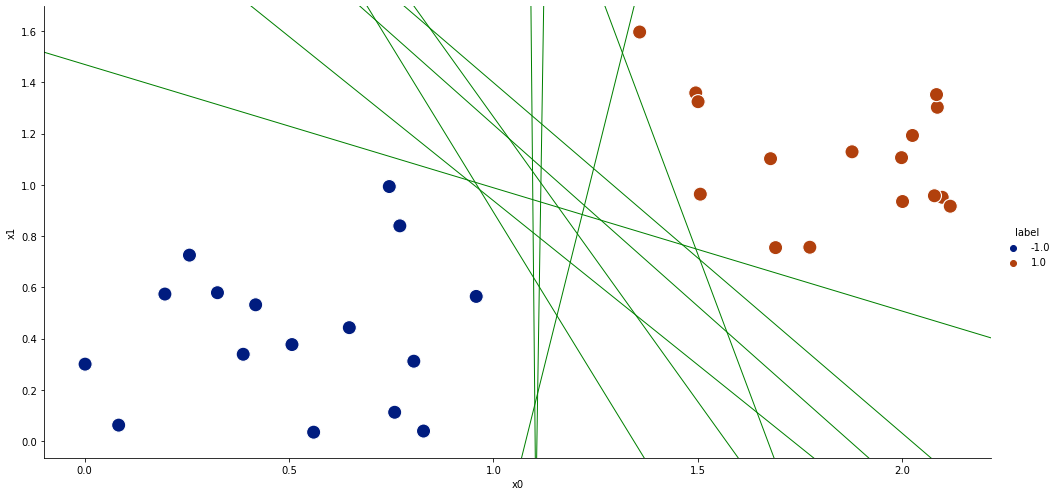

In [3]:
np.random.seed(1031)

x,y = get_data(32, True)

x_min,x_max = plot_data(x,y)

# only draw lines that seperate the data
n_lines = 10
for _ in range(n_lines):
    w,b = get_random_line()
    while not lineary_separates_2D(x,y,w,b):
        w,b = get_random_line()
    draw_line(w,b,x_min,x_max) 



In [4]:
def get_random_direction():
  """
  :return: a numpy array of size (2,) with a vector of size 1 with random direction
  """

  theta = rand() * 2 * np.pi
  return np.array([np.cos(theta), np.sin(theta)])

def direction_lineary_separates_2D(x, y, w):
  """
  :return: boolean determining whether there exists a line with direction determined 
  by w which separates the data points correctly
  """
  projected = x.dot(w)
  l = np.max( projected[ y == -1 ] ) # get -1 labeled data and project
  r = np.min( projected[ y ==  1 ] ) # get +1 labeled data and project
  return l < r # if the highest projection of -1 is still lower than smallest +1, then seperatble

def find_line_with_margins(x, y, w):
  """
  Find a line with direction determined by w that has the largest margins
  """

  projected = x.dot(w)
  l = np.max( projected[ y == -1 ] )
  r = np.min( projected[ y ==  1 ] )
  b = - (l + r) / 2
  scale = 2 / (r-l)
  
  return w * scale, b * scale

def draw_line_with_margin(w, b, x_min, x_max):
  """
  Draw the line determined by w and b with margins
  """

  draw_line(w, b  , x_min, x_max)
  draw_line(w, b-1, x_min, x_max, color='red')
  draw_line(w, b+1, x_min, x_max, color='red')

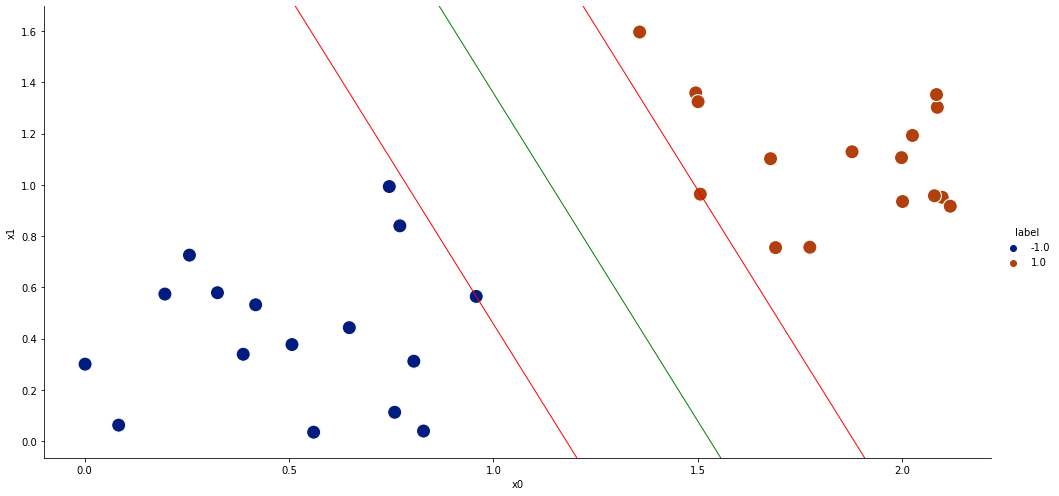

In [5]:
np.random.seed(1031)

x, y = get_data(all_points=32)

# find a valid line
w = get_random_direction()
while not direction_lineary_separates_2D(x, y, w):
    w = get_random_direction()
w, b = find_line_with_margins(x, y, w)

# plot all
x_min, x_max = plot_data(x, y)
draw_line_with_margin(w, b, x_min, x_max)

In [ ]:
#"""
print(x)
l = x[y == -1] 
r = x[y == 1]
print(l)
print(r)
print(np.max(l[:,0]))
print(np.min(r[:,0]))
index_l = np.argmax(l[:,0])
index_r = np.argmin(r[:,0])
pt1 = l[index_l,:].copy()
pt2 = r[index_r,:].copy()
print('the left point:',pt1)
print('the right point:',pt2)
dist = np.sqrt((pt2[0]-pt1[0])**2 + (pt2[1]-pt1[1])**2)
print('the margin:',dist)
# cest faux (ci-dessus)
#"""
2/np.sqrt(w[0]**2+w[1]**2)

[[1.01797110e-03 3.00091020e-01]
 [2.56328610e-01 7.25603474e-01]
 [3.24818839e-01 5.78871998e-01]
 [4.18229764e-01 5.31703202e-01]
 [7.70970604e-01 8.39854392e-01]
 [9.57739121e-01 5.64467296e-01]
 [1.96256881e-01 5.73626012e-01]
 [5.60088447e-01 3.45562518e-02]
 [8.28881777e-01 3.89555069e-02]
 [7.45089139e-01 9.93255118e-01]
 [5.07090241e-01 3.76524791e-01]
 [7.58294445e-01 1.12269875e-01]
 [8.31928915e-02 6.20742308e-02]
 [6.47318729e-01 4.42521495e-01]
 [3.87810055e-01 3.38679416e-01]
 [8.05133471e-01 3.11612980e-01]
 [2.09758935e+00 9.51378970e-01]
 [1.50588589e+00 9.63492157e-01]
 [2.08564497e+00 1.30261848e+00]
 [1.49477186e+00 1.35877660e+00]
 [1.77382558e+00 7.56437927e-01]
 [1.50043676e+00 1.32445525e+00]
 [1.69000783e+00 7.54869100e-01]
 [2.02485196e+00 1.19261788e+00]
 [1.67769063e+00 1.10197244e+00]
 [2.07855508e+00 9.57285174e-01]
 [2.00057234e+00 9.34831443e-01]
 [2.08367720e+00 1.35218159e+00]
 [2.11727311e+00 9.16582553e-01]
 [1.35753841e+00 1.59637338e+00]
 [1.998117

0.6557531153622747

In [ ]:
#print(x_min,x_max)
#w,b = get_random_line()
#projected = x.dot(w)
#print(projected)
#print(y==-1)
#projected[y==-1]

In [6]:
def loss(w, b, lam, x, y):
  """
  Calculates loss of the SVM defined by w and b, given the data x, y

  :param w: a numpy array of size 2 with coefficients of the line
  :param b: scalar, the constant of the line
  :param lam: scalar hyperparameter of SVN
  :param x: numpy array of size (N, 2) with the data points
  :param y: numpy array of size (B, ) with the data labels (1 or -1)

  :return: scalar the Loss 
  """

  # write your code here
  
  #np.sqrt(w[0]**2+w[1]**2) + (lam*1/x.shape[0]) * np.sum(np.maximum(0, 1 - np.multiply(y, x.dot(w)+b)))
  loss = np.sqrt(w[0]**2+w[1]**2) + (lam*1/x.shape[0]) * np.sum(np.maximum(0, 1 - np.multiply(y, x.dot(w)+b)))
  #loss = (w[0]**2+w[1]**2) + (lam*1/x.shape[0]) * np.sum(np.maximum(0, 1 - np.multiply(y, x.dot(w)+b)))
  #print('loss:',loss)
  return loss

In [ ]:
'''
x1 = np.array([[1,2],[3,4],[5,6],[1,2]])
w1 = np.array([1,2])
y1 = np.array([-1,-1,1,1])
b1 = 1
h1 = x1.dot(w1)+1
res = 1 - np.multiply(y1,h1)
print(res)
res = np.maximum(0,res)
print(res)
np.sum(res)
(w[0]**2+w[1]**2)+np.sum(res)
'''

[  7  13 -17  -5]
[ 7 13  0  0]


22.19059069141525

In [7]:
def gradient(w, b, lam, x, y):
  """
  Calculates loss of the SVM defined by w and b, given the data x, y

  :param w: a numpy array of size (2,) with coefficients of the line
  :param b: scalar, the constant of the line
  :param lam: scalar hyperparameter of SVN
  :param x: numpy array of size (N, 2) with the data points
  :param y: numpy array of size (B,) with the data labels (1 or -1)

  :return: a tuple (grad_w, grad_b) 
  - grad_w: a numpy array of size (2,) with the gradient of w w.r.t. Loss
  - grad_b: a scalar of the gradient of b w.r.t. Loss
  """
  
  # write your code here

  res = 1 - np.multiply(y, x.dot(w)+b)
  res = np.where(res>=0,1,0) # step function u
  b = (-lam*1/x.shape[0]) * np.dot(y,res)
  
  W = (1/np.sqrt(w[0]**2+w[1]**2)) * w -lam*(1/x.shape[0]) * np.dot(x.T, np.multiply(y,res))
  #W = (1/(w[0]**2+w[1]**2)) * w - lam*(1/x.shape[0]) * np.dot(x.T, np.multiply(y,res))
  return W, b

In [ ]:
"""
x2 = np.array([[1,2],[3,4],[5,6],[1,2]])
w2 = np.array([1,2])
y2 = np.array([-1,-1,1,1])
b2 = 1
h2 = x1.dot(w1)+b2
res2 = 1 - np.multiply(y2,h2)
print(res2)
resres = np.where(res2>=0,1,0)
print(resres)
h22 = np.multiply(y2,resres)
print(h22)
np.dot(x2.T,h22)
"""
x2 = np.array([[1,2],[3,4],[5,6],[1,2]])
test = np.array([-1,-1,0,0])
test2 = np.array([1,1,1,1])
np.dot(x2.T,test)
np.dot(test,test2)

-2

In [8]:
def get_alpha(w, b, grad_w, grad_b, lam, x, y):
  """
  :return: a scalar that determines the size of the step for optimisation
  """
  alpha = 1
  loss_val = loss(w, b, lam, x, y)
  for i in range(50):
    w_new = w - alpha * grad_w
    b_new = b - alpha * grad_b
    loss_new = loss(w_new, b_new, lam, x, y)
    if loss_new <= loss_val: # - alpha * 0.5 * (grad_w.dot(grad_w) + grad_b ** 2):
      return alpha    
    alpha = alpha / 1.2
  return 0

i : 48


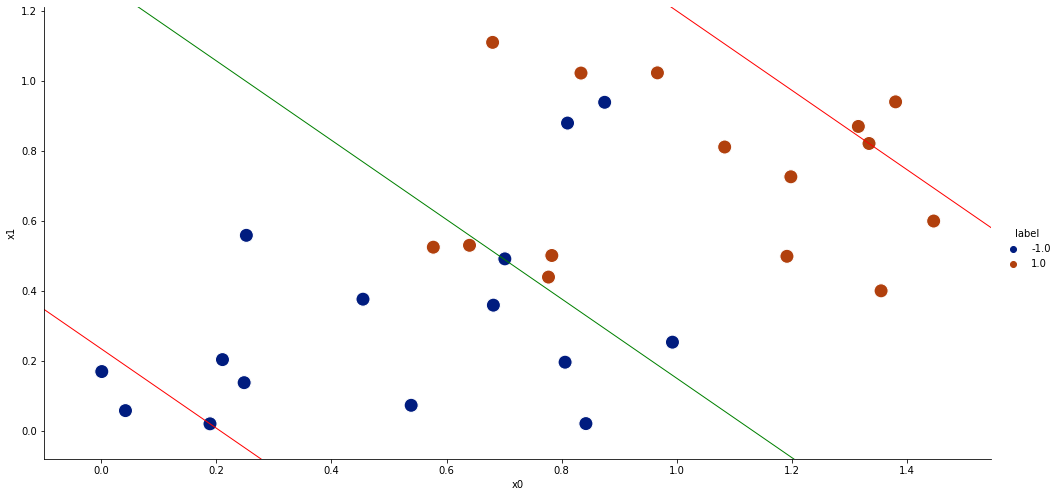

In [21]:
lam = 5

np.random.seed(1034)
x, y = get_data(all_points=30, separable=False)
w = np.ones((2,))
b = 1

N_iter = 1000
for i in range(1, N_iter):
  loss_val = loss(w, b, lam, x, y)
  if i % (N_iter // 10) == 0:
    print("step : {:3} , Loss : {}".format(i, loss_val))

  grad_w, grad_b = gradient(w, b, lam, x, y)
  alpha = get_alpha(w, b, grad_w, grad_b, lam, x, y)
  w -= grad_w * alpha
  b -= grad_b * alpha
  
  if alpha == 0:
    print("i : {}".format(i))
    break
  
x_min, x_max = plot_data(x, y)
draw_line_with_margin(w, b, x_min, x_max)
